# Analysis of Microarray & Microtiter plates
Analysis of peptide-virus binding signals.

This notebook provides simple visualisation and analysis functions to work with experimental data sets from the FluType project.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import normalize
import matplotlib.cm as cm
import matplotlib.patches as patches
import matplotlib.colors as colors

# import string
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# from mpl_toolkits.mplot3d import Axes3D
# import pyexcel 
# import json

## Load dataset for analysis
Here the different data sets are loaded and brought in a common standard format for the analysis pipeline.

In [37]:
from IPython.display import display, HTML
data_ids = {'2017-05-12_MTP_R1', 'flutype_test' }

#--------------------------
# data_id = '2017-05-12_MTP_R1'
data_id = 'flutype_test'
#--------------------------
if data_id == '2017-05-12_MTP_R1': 
    # Microtiter Plate (2017-05-12, 1 plate, 1/3 repeats)
    meta = pd.read_csv("data/{}.meta".format(data_id), sep='\t')
    output = pd.read_csv("data/{}.csv".format(data_id), sep=',', index_col=0)
    output = output.T
    
    # todo: this information has to be pulled out from data (in meta information for experiment)
    output.insert(0,"virus",["X31A","X31","X31","X31","Pan","Pan","Pan","Calif","Calif","Calif","leer","leer"])
    
elif data_id == "flutype_test":
    # Microarray (1 plate, 1 measurement)
    meta = pd.read_csv("data/{}.meta".format(data_id), sep='\t')
    output = pd.read_csv("data/{}.csv".format(data_id) , sep='\t')

display(meta)
display(output)

,field,info
0,type,Microarray
1,date,?
2,repeat,1
3,total_repeats,1
4,virus,?
5,peptides,?


,virus,P1,P3,P4,P5,P6,P7,P8,P10,P13
0,X31,1569,2185,3988,3104,161,394,788,4396,443
1,X31,1840,2203,5003,2975,148,613,726,4284,486
2,X31,2039,2269,5163,3067,126,689,692,3493,372
3,X31,1168,1578,4211,1948,172,568,258,3472,314
4,H1,510,892,2609,2874,484,849,1650,2791,1445
5,H1,524,971,3227,2727,573,1384,1527,2950,1482
6,H1,580,657,3020,2175,732,1951,1947,2907,1174
7,H1,504,1007,1469,1993,521,1598,1802,2952,1325
8,H5,702,1504,2476,2942,374,379,627,1279,1697
9,H5,1187,1974,2864,3707,521,903,590,1328,1736


In [18]:
?? pd.read_csv

In [4]:
x_train=output.drop('virus', axis=1)
x_train.head()

,P1,P3,P4,P5,P6,P7,P8,P10,P13
0,1569,2185,3988,3104,161,394,788,4396,443
1,1840,2203,5003,2975,148,613,726,4284,486
2,2039,2269,5163,3067,126,689,692,3493,372
3,1168,1578,4211,1948,172,568,258,3472,314
4,510,892,2609,2874,484,849,1650,2791,1445


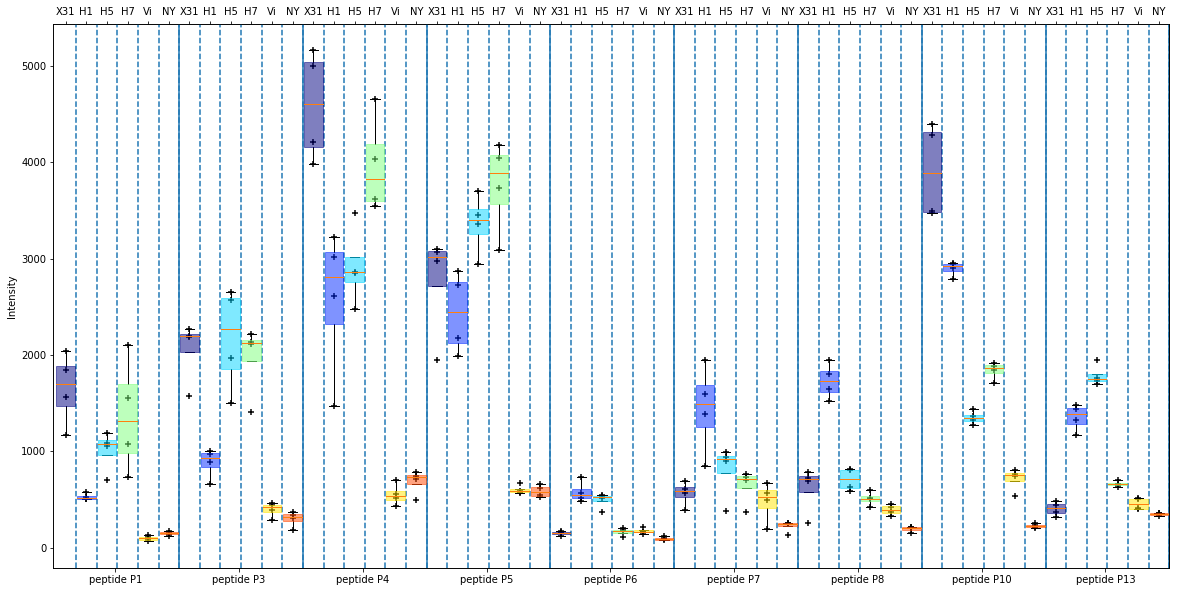

In [5]:

fig = plt.figure(figsize=(20,10))
ax2 = plt.subplot(111)
ax = ax2.twiny()

# for x-axis ticks and labels
peptide_ticks_x_axis = []
virus_ticks_x_axis = []
virus_label_x_axis = []


cmap  = plt.get_cmap('jet')
spacing = 1.0 / len(output.virus.unique())

for peptide,index_peptide in zip(output.columns[1:],range(len(output.columns[1:]))):
    for virus,index_virus in zip(output.virus.unique(),range(len(output.virus.unique()))):
        
        #draw vertical dashed line to seperate viruses
        plt.axvline(x=[index_peptide + index_virus * spacing + spacing * 0.5 ], linestyle='dashed')
        
        # add x-tick position and label for virus
        virus_ticks_x_axis.append(index_peptide + index_virus * spacing)
        virus_label_x_axis.append(virus)
        
        #select data with current peptide and virus 
        data = x_train[peptide].where(output.virus==virus)
        data = data.dropna(axis=0, how='all')
        
        
        #scatter plot data
        ax.scatter(index_peptide  * np.ones(data.shape) + index_virus * spacing, data, color='k', marker='+')

        
        #plot  boxplot if more than one datapoint
        if len(data) > 1: 
            
            data = pd.to_numeric(data)
            bp = ax.boxplot(data.values, positions=[index_peptide+index_virus*spacing], patch_artist=True, showfliers=False)
            plt.setp(bp['boxes'] , color=cmap(index_virus / len(output.virus.unique())) , alpha=0.5)
            

    # add x-tick position and label for peptide    
    peptide_ticks_x_axis.append(index_peptide + 0.4) 
    
    #draw vertical line to seperate peptides
    plt.axvline(x=index_peptide + 1 - spacing * 0.5 )

#setup upper x-axis            
plt.xticks(virus_ticks_x_axis,virus_label_x_axis)
ax.set_xlim(-0.1 , index_peptide + 1 - spacing * 0.5 )

#setup lower x-axis
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(peptide_ticks_x_axis)
ax2.set_xticklabels(["peptide " + str(s) for s in output.columns[1:]])

ax2.set_ylabel("Intensity")
plt.show()



In [6]:
def map_virus_to_number(viruses):
    """transform the virus name into a number"""
    viruses = pd.get_dummies(viruses)
    a = np.arange(viruses.shape[1]) + 1
    virus_numeric = (a * viruses).T.sum()
    return virus_numeric


def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a String or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for String, None, or a colormap instance:
    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

In [7]:
#build model
pca = decomposition.PCA()
pca.fit(x_train)


#perform pca
pca_score = pca.explained_variance_ratio_
pca_components = pca.components_
x_train_pca = pca.transform(x_train)



output_pca = pd.DataFrame(x_train_pca, index=x_train.index, columns=x_train.columns)
output_pca.insert(0, "color", map_virus_to_number(output["virus"]))
output_pca.insert(1, "virus", output["virus"])

print("PCA score for principal components:", pca_score.round(3))
corr_values = dict(zip(x_train.columns, pca_components[0]))
feature_max_cor = max(corr_values, key=corr_values.get)
print("Feature with max. Variation:",feature_max_cor )
print("PCA Components in feature space:", pca_components[0])

data = x_train.convert_objects(convert_numeric=True)

cor_to_strongest_feature = data[data.columns[:]].corr()[feature_max_cor][:]
print("The Correlation of the Features to the Feature with highest Varaiance")
print(cor_to_strongest_feature)


PCA score for principal components: [ 0.754  0.119  0.085  0.018  0.011  0.009  0.003  0.002  0.   ]
Feature with max. Variation: P4
PCA Components in feature space: [ 0.2419204   0.3079076   0.63758704  0.48778138  0.02177407  0.07039287
  0.07832974  0.43061312  0.07229833]
The Correlation of the Features to the Feature with highest Varaiance
P1     0.887674
P3     0.838442
P4     1.000000
P5     0.849343
P6     0.149624
P7     0.276062
P8     0.250445
P10    0.772283
P13    0.181258
Name: P4, dtype: float64


/home/mkoenig/envs/flutype-analysis/lib/python3.5/site-packages/ipykernel_launcher.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


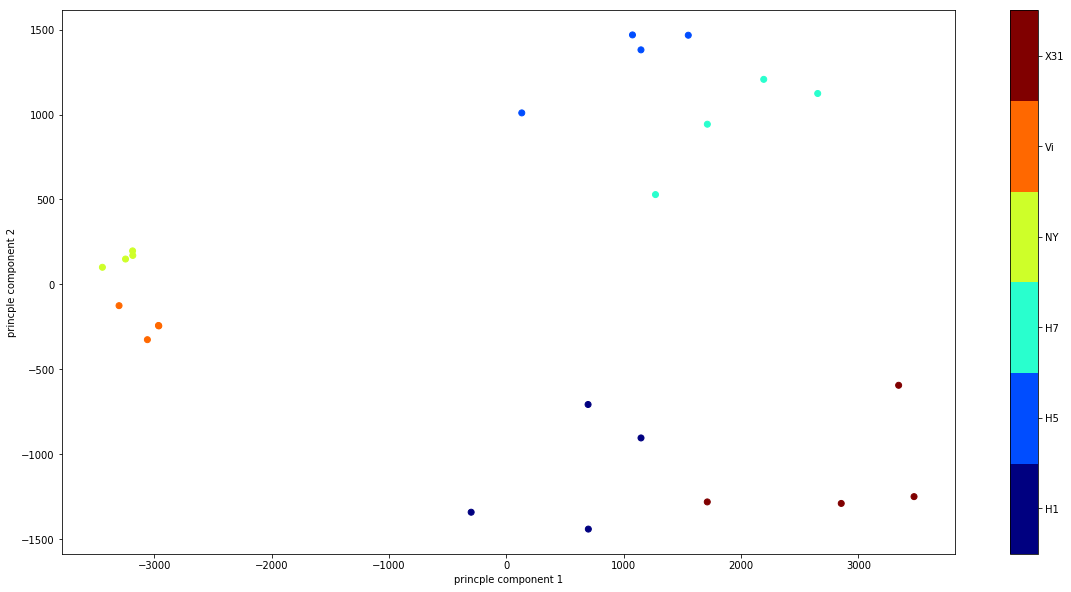

In [8]:
fig = plt.figure(figsize=(20, 10))
plt.xlabel("princple component 1")
plt.ylabel("princple component 2")
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=output_pca["color"].values, cmap=discrete_cmap(output_pca["color"].values.max(), 'jet'))
cbar = plt.colorbar(ticks=sorted(output_pca["color"].unique()))
color_mapping = output_pca[['color','virus']].sort_values(by=["color"])
cbar.set_ticklabels(color_mapping['virus'].unique())
plt.clim(0.5, output_pca["color"].values.max() + 0.5)

plt.show()


/home/mkoenig/envs/flutype-analysis/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


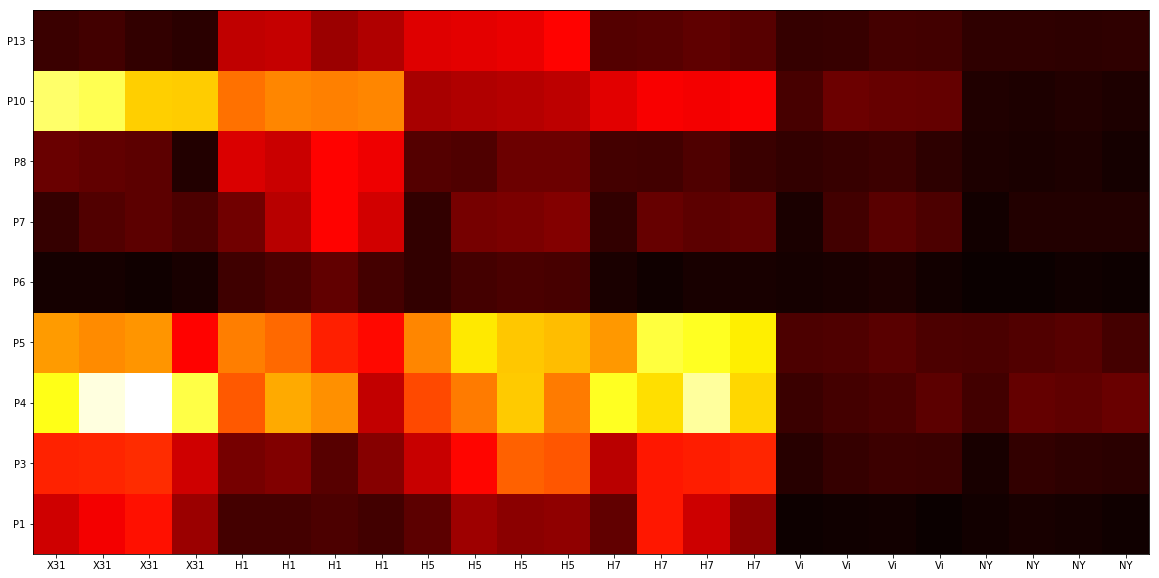

In [9]:
#heatmap of microwellplate
data = x_train.convert_objects(convert_numeric=True)

fig = plt.figure(figsize=(20,10))
plt.pcolor(data.T,cmap='hot')
plt.xticks(np.arange(0.5, len(data.index), 1), output['virus'])
plt.yticks(np.arange(0.5, len(data.columns), 1), data.columns)
plt.show()